<a href="https://colab.research.google.com/github/Cann-Emma/DS1002-zgb8ts/blob/main/notebooks/19-dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plots and Charts in Python

We have worked with one simple plotting/visualization library for Python so far: `matplotlib`. It is one of the most common and most powerful viz libraries, but it's not the only one. Let's look at a few more:

- [Seaborn](https://seaborn.pydata.org/)
- [Plotly](https://plotly.com/python/)
- [GGplot](https://github.com/yhat/ggpy)


Inspiration:
- [NYTimes Data](https://www.nytimes.com/spotlight/graphics)
- [D3 JS](https://observablehq.com/@d3/gallery)



# Matplotlib

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# Create some data
rng = np.random.RandomState(0)              # creates a random range seeded from 0
x = np.linspace(0, 10, 500)                 # creates evenly spaced numbers of a specified interval
y = np.cumsum(rng.randn(500, 6), 0)         # creates the sum of random numbers within a range.

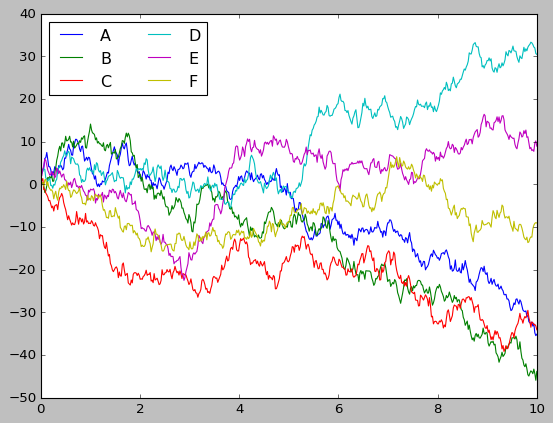

In [3]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

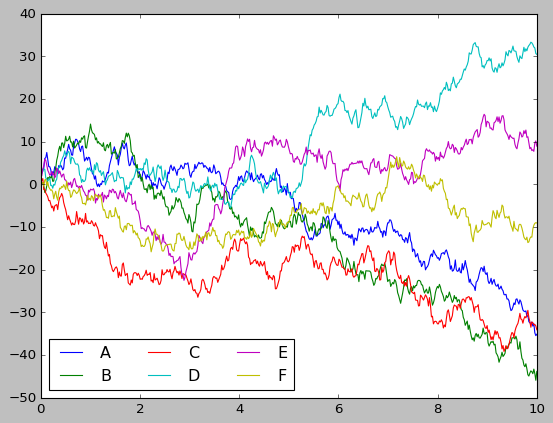

In [5]:
plt.plot(x,y)
plt.legend('ABCDEF', ncol= 3, loc= 'lower left')

# Seaborn

Now let's look at that same data using Seaborn

In [6]:
import seaborn as sns
sns.set()

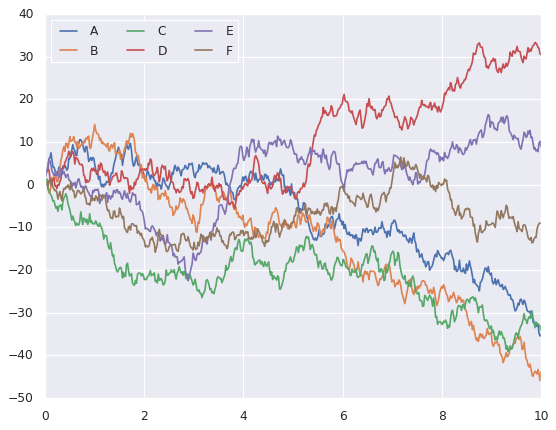

In [7]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=3, loc='upper left');

(array([ 14.,  80., 210., 416., 529., 438., 230.,  62.,  20.,   1.]),
 array([-4.3670222 , -3.41191802, -2.45681385, -1.50170968, -0.54660551,
         0.40849867,  1.36360284,  2.31870701,  3.27381119,  4.22891536,
         5.18401953]),
 <BarContainer object of 10 artists>)

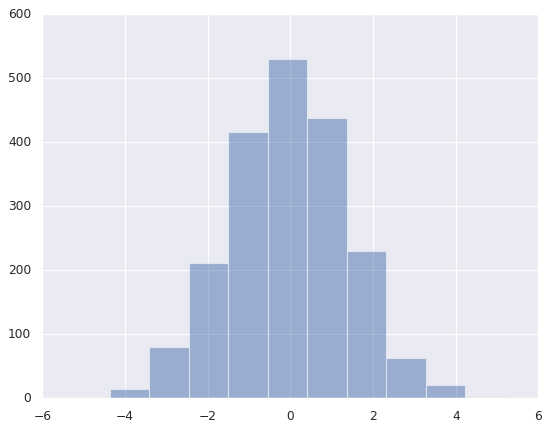

In [11]:
plt.hist(data[col], alpha= 0.5, bins= 10)

Histograms and Joint Distributions in Seaborn

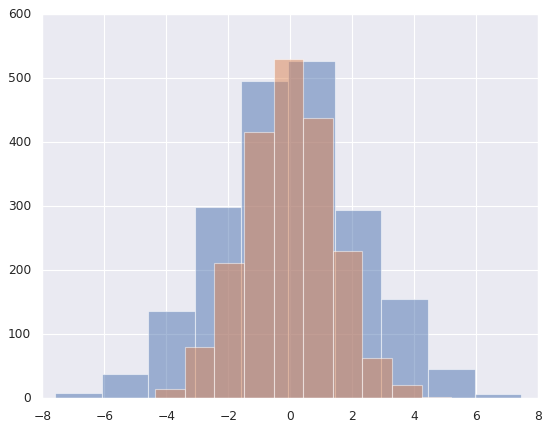

In [8]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], alpha=0.5)

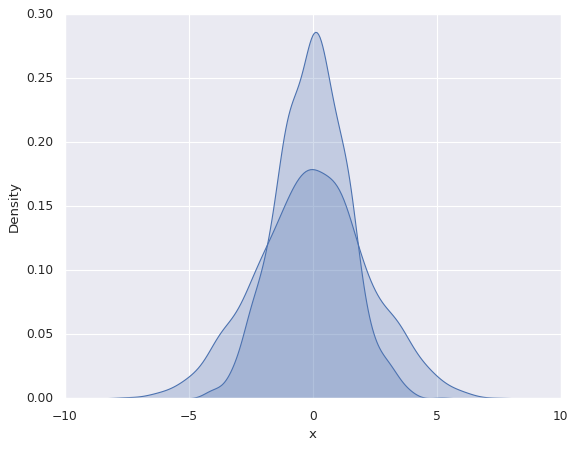

In [12]:
# or smooth that out:

for col in 'xy':
    sns.kdeplot(data[col], fill=True)

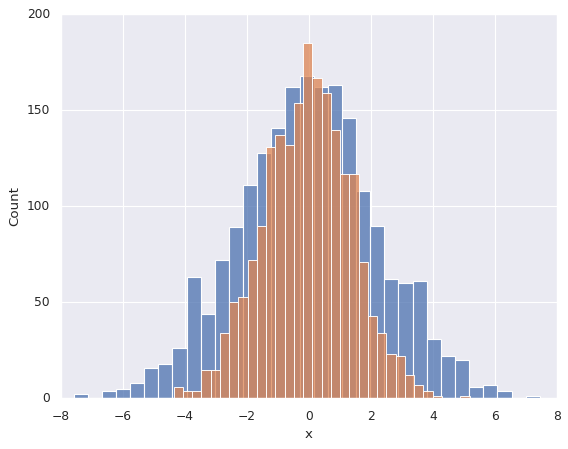

In [9]:
# or make that a histogram using `histplot`

sns.histplot(data['x'])
sns.histplot(data['y']);

In [ ]:
# or pass the 2-d dataset into kdeplot to get a 2-d viz of the data

sns.kdeplot(data)

- - -

# Plotly

In [13]:
# import packages

!pip install chart_studio

import pandas as pd
import numpy as np
import scipy as sp
import chart_studio
import chart_studio.plotly as py
import plotly.figure_factory as ff

chart_studio.tools.set_credentials_file(username='nem2p', api_key='s0c2axozox4yaK0bKATo')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.1 MB/s eta 0:00:00


In [16]:
# import data as a dataframe

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

table = ff.create_table(df)
py.iplot(table, filename='jupiter-file1')

In [17]:
# Get the standard deviation for each column:

df.std(numeric_only=True)

Women    12.813683
Men      25.705289
Gap      14.137084
dtype: float64

In [19]:
import chart_studio.plotly as py
import plotly.graph_objects as go

data = [go.Bar(x=df.School,
            y=df.Gap)]

py.iplot(data, filename='jupiter-basic_bar')

In [20]:
import chart_studio.plotly as py
import plotly.graph_objects as go

trace_women = go.Bar(x=df.School,
                  y=df.Women,
                  name='Women',
                  marker=dict(color='#ffcdd2'))

trace_men = go.Bar(x=df.School,
                y=df.Men,
                name='Men',
                marker=dict(color='#A2D5F2'))

trace_gap = go.Bar(x=df.School,
                y=df.Gap,
                name='Gap',
                marker=dict(color='#59606D'))

data = [trace_women, trace_men, trace_gap]

layout = go.Layout(title="Average Earnings for Graduates",
                xaxis=dict(title='School'),
                yaxis=dict(title='Salary (in thousands)'))

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, sharing='public', filename='jupiter-styled_bar')

## Mapping

In [ ]:
import chart_studio.plotly as py
import plotly.graph_objects as go
import pandas as pd

mapbox_access_token = 'sk.eyJ1IjoibmVtMnAiLCJhIjoiY2xvbXdhMzdxMTdoajJqbWl0eWljOGl5ciJ9.K_nxX8l8BjI7BXHEFeudLw'

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/Nuclear%20Waste%20Sites%20on%20American%20Campuses.csv')
site_lat = df.lat
site_lon = df.lon
locations_name = df.text

data = [
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=17,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        text=locations_name,
        hoverinfo='text'
    ),
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=8,
            color='rgb(242, 177, 172)',
            opacity=0.7
        ),
        hoverinfo='none'
    )]


layout = go.Layout(
    title='Nuclear Waste Sites on Campus',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38,
            lon=-94
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='jupiter-Nuclear Waste Sites on American Campuses')

![Mapping Plot](https://s3.amazonaws.com/ds1002-resources/images/plotly-mapping.png)

## 3-D Plotting

In [ ]:
import chart_studio.plotly as py
import plotly.graph_objects as go

import numpy as np

s = np.linspace(0, 2 * np.pi, 240)
t = np.linspace(0, np.pi, 240)
tGrid, sGrid = np.meshgrid(s, t)

r = 2 + np.sin(7 * sGrid + 5 * tGrid)  # r = 2 + sin(7s+5t)
x = r * np.cos(sGrid) * np.sin(tGrid)  # x = r*cos(s)*sin(t)
y = r * np.sin(sGrid) * np.sin(tGrid)  # y = r*sin(s)*sin(t)
z = r * np.cos(tGrid)                  # z = r*cos(t)

surface = go.Surface(x=x, y=y, z=z)
data = [surface]

layout = go.Layout(
    title='Parametric Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='jupiter-parametric_plot')

![Animated Plot](https://s3.amazonaws.com/ds1002-resources/images/plotly-parametric.png)

## Animated Plots

![Animated Plot](https://s3.amazonaws.com/ds1002-resources/images/plotly-animated.png)